### Merging on Keys

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [4]:
dframe1 = DataFrame({'key':['x','z','y','z','x','x'], 'data_set_1':np.arange(6)})

In [5]:
dframe1

,data_set_1,key
0,0,x
1,1,z
2,2,y
3,3,z
4,4,x
5,5,x


In [6]:
dframe2 = DataFrame({'key':['q','y','z'], 'data_set_2':[1,2,3]})

dframe2

,data_set_2,key
0,1,q
1,2,y
2,3,z


In [7]:
pd.merge(dframe1, dframe2)

,data_set_1,key,data_set_2
0,1,z,3
1,3,z,3
2,2,y,2


In [8]:
pd.merge(dframe1, dframe2, on='key')

,data_set_1,key,data_set_2
0,1,z,3
1,3,z,3
2,2,y,2


In [9]:
pd.merge(dframe1, dframe2, on='key', how='left')

,data_set_1,key,data_set_2
0,0,x,NaN
1,1,z,3
2,2,y,2
3,3,z,3
4,4,x,NaN
5,5,x,NaN


In [10]:
pd.merge(dframe1, dframe2, on='key', how='right')

,data_set_1,key,data_set_2
0,1,z,3
1,3,z,3
2,2,y,2
3,NaN,q,1


In [11]:
pd.merge(dframe1, dframe2, on='key', how='outer')

,data_set_1,key,data_set_2
0,0,x,NaN
1,4,x,NaN
2,5,x,NaN
3,1,z,3
4,3,z,3
5,2,y,2
6,NaN,q,1


In [13]:
# Many to many merge
dframe3 = DataFrame({'key':['x','x','x','y','z','z'], 'data_set_3':range(6)})
dframe4 = DataFrame({'key':['x','x','y','y','z'], 'data_set_4':range(5)})

dframe3

,data_set_3,key
0,0,x
1,1,x
2,2,x
3,3,y
4,4,z
5,5,z


In [14]:
dframe4

,data_set_4,key
0,0,x
1,1,x
2,2,y
3,3,y
4,4,z


In [15]:
pd.merge(dframe3,dframe4)

,data_set_3,key,data_set_4
0,0,x,0
1,0,x,1
2,1,x,0
3,1,x,1
4,2,x,0
5,2,x,1
6,3,y,2
7,3,y,3
8,4,z,4
9,5,z,4


In [16]:
df_left=DataFrame({'key1':['SF','SF','LA'], 
                   'key2':['one','two','one'],
                  'left_data':[10,20,30]})
df_right=DataFrame({'key1':['SF','SF','LA','LA'], 
                   'key2':['one','one','one','two'],
                  'left_data':[40,50,60,70]})

In [17]:
df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [18]:
df_right

,key1,key2,left_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [19]:
# Union of the two keys
pd.merge(df_left,df_right,on=['key1','key2'], how='outer')

,key1,key2,left_data_x,left_data_y
0,SF,one,10,40
1,SF,one,10,50
2,SF,two,20,NaN
3,LA,one,30,60
4,LA,two,NaN,70


In [20]:
pd.merge(df_left,df_right,on='key1')

,key1,key2_x,left_data_x,key2_y,left_data_y
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [21]:
pd.merge(df_left,df_right,on='key1',suffixes=('_lefty','_righty'))

,key1,key2_lefty,left_data_lefty,key2_righty,left_data_righty
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


In [23]:
# For more info on merge parameters check out:
url = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html'
import webbrowser
webbrowser.open(url)

True

### Merging on Index

In [24]:
df_left = DataFrame({'key':['x','y','z','x','y'],
                    'data':range(5)})

In [25]:
df_left

,data,key
0,0,x
1,1,y
2,2,z
3,3,x
4,4,y


In [30]:
df_right = DataFrame({'group_data':[10,20]},index=['x','y'])

In [31]:
df_right

,group_data
x,10
y,20


In [34]:
pd.merge(df_left,df_right,left_on='key',right_index=True)

,data,key,group_data
0,0,x,10
3,3,x,10
1,1,y,20
4,4,y,20


In [44]:
df_left_hr = DataFrame({'key1':['SF','SF','SF','LA','LA'],
                       'key2':[10,20,30,20,30],
                       'data_set':np.arange(5.)})

In [45]:
df_left_hr

,data_set,key1,key2
0,0,SF,10
1,1,SF,20
2,2,SF,30
3,3,LA,20
4,4,LA,30


In [46]:
df_right_hr = DataFrame(np.arange(10).reshape((5, 2)),
                   index=[['LA','LA','SF','SF','SF'],
                          [20, 10, 10, 10, 20]],
                   columns=['col_1', 'col_2'])

In [47]:
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [48]:
# Now we can merge the left by using keys and the right by its index
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True)

,data_set,key1,key2,col_1,col_2
0,0,SF,10,4,5
0,0,SF,10,6,7
1,1,SF,20,8,9
3,3,LA,20,0,1


In [49]:
# Use join to join two dataframes
df_left.join(df_right)

,data,key,group_data
0,0,x,NaN
1,1,y,NaN
2,2,z,NaN
3,3,x,NaN
4,4,y,NaN


### Concatenate

In [50]:
# Create a matrix 
arr1 = np.arange(9).reshape((3,3))

In [51]:
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [54]:
# Concatenate along axis 1 (columns). To concatenate along rows set axis=0
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [59]:
# Create 2 series with no overlap. Then use pandas concat function to concatenate the 2 series. Default is axis=0
ser1 =  Series([0,1,2],index=['T','U','V'])
ser2 = Series([3,4],index=['X','Y'])

pd.concat([ser1,ser2])

T    0
U    1
V    2
X    3
Y    4
dtype: int64

In [60]:
# Along the other axis (axis=1) will produce a DataFrame
pd.concat([ser1,ser2], axis=1)

,0,1
T,0,NaN
U,1,NaN
V,2,NaN
X,NaN,3
Y,NaN,4


In [61]:
# Add keys to the concatenation result using a hierarchical index
pd.concat([ser1,ser2],keys=['cat1','cat2'])

cat1  T    0
      U    1
      V    2
cat2  X    3
      Y    4
dtype: int64

In [62]:
# Along the axis=1, the Keys become column headers
pd.concat([ser1,ser2],axis=1,keys=['cat1','cat2'])

,cat1,cat2
T,0,NaN
U,1,NaN
V,2,NaN
X,NaN,3
Y,NaN,4


In [68]:
# Now use concatenate with data frames
from numpy.random import randn
dframe1 = DataFrame(randn(4,3), columns=['X', 'Y', 'Z'])
dframe2 = DataFrame(randn(3, 3), columns=['Y', 'Q', 'X'])

In [69]:
dframe1

,X,Y,Z
0,1.651279,1.155190,0.784561
1,-0.776763,1.674793,-0.600413
2,-0.018248,-1.897164,0.657440
3,-0.108305,2.442789,0.411128


In [70]:
dframe2

,Y,Q,X
0,-2.040194,-0.661319,-0.625519
1,1.367540,-1.432233,-0.075456
2,-2.161201,-0.516164,-1.390366


In [73]:
# Concatenate dframe1 and dframe2. Default is axis=0
pd.concat([dframe1,dframe2])

,Q,X,Y,Z
0,NaN,1.651279,1.155190,0.784561
1,NaN,-0.776763,1.674793,-0.600413
2,NaN,-0.018248,-1.897164,0.657440
3,NaN,-0.108305,2.442789,0.411128
0,-0.661319,-0.625519,-2.040194,NaN
1,-1.432233,-0.075456,1.367540,NaN
2,-0.516164,-1.390366,-2.161201,NaN


In [74]:
#If we dont care about the index info and just awnt to make a complete DataFrame, just use ignore_index
pd.concat([dframe1,dframe2],ignore_index=True)

,Q,X,Y,Z
0,NaN,1.651279,1.155190,0.784561
1,NaN,-0.776763,1.674793,-0.600413
2,NaN,-0.018248,-1.897164,0.657440
3,NaN,-0.108305,2.442789,0.411128
4,-0.661319,-0.625519,-2.040194,NaN
5,-1.432233,-0.075456,1.367540,NaN
6,-0.516164,-1.390366,-2.161201,NaN


In [75]:
#For more info in documentation:
url='http://pandas.pydata.org/pandas-docs/dev/generated/pandas.tools.merge.concat.html'
webbrowser.open(url)

True

### Combining DataFrames

In [77]:
nan = np.nan
ser1 = Series([2,nan,4,nan,6,nan],
           index=['Q','R','S','T','U','V'])

ser2 = Series(np.arange(len(ser1), dtype=np.float64),
           index=['Q','R','S','T','U','V'])

In [78]:
ser1

Q     2
R   NaN
S     4
T   NaN
U     6
V   NaN
dtype: float64

In [79]:
ser2

Q    0
R    1
S    2
T    3
U    4
V    5
dtype: float64

In [81]:
# Replace the null value in series ser1 by the corresponding value in series ser2. Use np.where for the logic
Series(np.where(pd.isnull(ser1),ser2,ser1), index=ser1.index)

Q    2
R    1
S    4
T    3
U    6
V    5
dtype: float64

In [83]:
# Use the combine function from pandas instead
ser1.combine_first(ser2)

Q    2
R    1
S    4
T    3
U    6
V    5
dtype: float64

In [84]:
nan = np.nan
dframe_odds = DataFrame({'X':[1.,nan,3.,nan],
                        'Y':[nan,5.,nan,7.],
                        'Z':[nan,9,nan,11]})

dframe_even = DataFrame({'X':[2.,4.,nan,6.,8],
                        'Y':[nan,10.,12.,14.,16.]})

In [85]:
dframe_odds

,X,Y,Z
0,1,NaN,NaN
1,NaN,5,9
2,3,NaN,NaN
3,NaN,7,11


In [86]:
dframe_even

,X,Y
0,2,NaN
1,4,10
2,NaN,12
3,6,14
4,8,16


In [88]:
dframe_odds.combine_first(dframe_even)

,X,Y,Z
0,1,NaN,NaN
1,4,5,9
2,3,12,NaN
3,6,7,11
4,8,16,NaN


### Reshaping Data Frame

In [89]:
# Create DataFrame
dframe1 = DataFrame(np.arange(8).reshape((2, 4)),
                 index=pd.Index(['LA', 'SF'], name='city'),
                 columns=pd.Index(['A', 'B', 'C','D'], name='letter'))

In [90]:
dframe1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [91]:
# Use stack to pivot the columns into the rows. This ways columns into rows. index Hierarchy
dframe_st = dframe1.stack()

In [92]:
dframe_st

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int32

In [93]:
# Unstack
dframe_st.unstack()

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [94]:
# Unstack by the letter
dframe_st.unstack('letter')

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [95]:
# Unstack by the city
dframe_st.unstack('city')

city,LA,SF
letter,,
A,0,4
B,1,5
C,2,6
D,3,7


In [96]:
#Make two series
ser1 = Series([0, 1, 2], index=['Q', 'X', 'Y'])
ser2 = Series([4, 5, 6], index=['X', 'Y', 'Z'])

#Concat to make a dframe
dframe = pd.concat([ser1, ser2], keys=['Alpha', 'Beta'])

dframe

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: int64

In [98]:
dframe.unstack()

,Q,X,Y,Z
Alpha,0,1,2,NaN
Beta,NaN,4,5,6


In [99]:
# Stack it back to get rid of the null values
dframe.unstack().stack()

Alpha  Q    0
       X    1
       Y    2
Beta   X    4
       Y    5
       Z    6
dtype: float64

In [100]:
dframe = dframe.unstack()
dframe

,Q,X,Y,Z
Alpha,0,1,2,NaN
Beta,NaN,4,5,6


In [101]:
dframe.stack(dropna=False)

Alpha  Q     0
       X     1
       Y     2
       Z   NaN
Beta   Q   NaN
       X     4
       Y     5
       Z     6
dtype: float64

### Pivoting

In [102]:
#import pandas testing utility
import pandas.util.testing as tm; tm.N = 3

In [103]:
#Create a unpivoted function
def unpivot(frame):
    N, K = frame.shape
    
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    
    # Return the DataFrame
    return DataFrame(data, columns=['date', 'variable', 'value'])

#Set the DataFrame we'll be using
dframe = unpivot(tm.makeTimeDataFrame())

In [104]:
dframe

,date,variable,value
0,2000-01-03,A,-0.000608
1,2000-01-04,A,-1.163650
2,2000-01-05,A,-0.788888
3,2000-01-03,B,1.075519
4,2000-01-04,B,0.863797
5,2000-01-05,B,-0.791798
6,2000-01-03,C,0.561319
7,2000-01-04,C,-0.342206
8,2000-01-05,C,-1.627197
9,2000-01-03,D,-1.226891


In [105]:
# date to be the rows, variable to be the columns, and the filled values to be the value
dframe_piv = dframe.pivot('date','variable','value')

In [106]:
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,-0.000608,1.075519,0.561319,-1.226891
2000-01-04,-1.163650,0.863797,-0.342206,-0.408054
2000-01-05,-0.788888,-0.791798,-1.627197,-0.071111


### Duplicates in DataFrame

In [108]:
dframe = DataFrame({'key1': ['A'] * 2 + ['B'] * 3,
                  'key2': [2, 2, 2, 3, 3]})

In [109]:
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [110]:
# Use duplicated to find duplicates
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [111]:
# Use drop_duplicates to drop duplicates:
dframe.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [112]:
# Filter which duplicates to drop by a single column
dframe.drop_duplicates(['key1'])

,key1,key2
0,A,2
2,B,2


In [113]:
dframe.drop_duplicates(['key2'])

,key1,key2
0,A,2
3,B,3


In [114]:
#By default the first value was taken for the duplicates, we can also take the last value instead
dframe.drop_duplicates(['key1'],take_last=True)

,key1,key2
1,A,2
4,B,3


### Mapping

In [115]:
# Create a data frame
dframe = DataFrame({'city':['Alma','Brian Head','Fox Park'],
                    'altitude':[3158,3000,2762]})

In [116]:
dframe

,altitude,city
0,3158,Alma
1,3000,Brian Head
2,2762,Fox Park


In [123]:
# Add a column for the States using map method.
state_map={'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'}

dframe['state']=dframe['city'].map(state_map)

In [124]:
dframe

,altitude,city,state
0,3158,Alma,Colorado
1,3000,Brian Head,Utah
2,2762,Fox Park,Wyoming


### Replace

In [125]:
# make  Series
ser1 = Series([1,2,3,4,1,2,3,4])

In [126]:
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [127]:
# Replace 1 with a nan
ser1.replace(1,np.nan)

0   NaN
1     2
2     3
3     4
4   NaN
5     2
6     3
7     4
dtype: float64

In [128]:
#Can also input lists
ser1.replace([1,4],[100,400])

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [129]:
#Can also input dictionary
ser1.replace({4:np.nan})

0     1
1     2
2     3
3   NaN
4     1
5     2
6     3
7   NaN
dtype: float64

### Rename Index

In [130]:
# Make a DataFrame
dframe= DataFrame(np.arange(12).reshape((3, 4)),
                 index=['NY', 'LA', 'SF'],
                 columns=['A', 'B', 'C', 'D'])

In [131]:
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [132]:
#Let's use map to lowercase the city initials
dframe.index.map(str.lower)

array(['ny', 'la', 'sf'], dtype=object)

In [133]:
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [134]:
# If you want to assign this to the actual index, you can use index
dframe.index = dframe.index.map(str.lower)
#Show
dframe

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [135]:
# Use rename if you want to create a transformed version without modifying the original!

#str.title will capitalize the first letter, lowercasing the columns
dframe.rename(index=str.title, columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [136]:
# We can also use rename to insert dictionaries providing new values for indexes or columns!
dframe.rename(index={'ny': 'NEW YORK'},
            columns={'A': 'ALPHA'})

,ALPHA,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [137]:
# If you would like to actually edit the data set in place, set inplace=True
dframe.rename(index={'ny': 'NEW YORK'}, inplace=True)
dframe

,A,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


### Binning

In [138]:
years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

In [139]:
years

[1990, 1991, 1992, 2008, 2012, 2015, 1987, 1969, 2013, 2008, 1999]

In [140]:
# We can seperate these years by decade
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

In [141]:
# Now we'll use cut to get something called a Category object
decade_cat = pd.cut(years,decade_bins)
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, object): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [142]:
# We can check the categories using .categories
decade_cat.categories

Index([u'(1960, 1970]', u'(1970, 1980]', u'(1980, 1990]', u'(1990, 2000]',
       u'(2000, 2010]', u'(2010, 2020]'],
      dtype='object')

In [143]:
# Then we can check the value counts in each category
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [144]:
# Cut it into 2 bins
pd.cut(years,2,precision=1)

[(1969, 1992], (1969, 1992], (1969, 1992], (1992, 2015], (1992, 2015], ..., (1969, 1992], (1969, 1992], (1992, 2015], (1992, 2015], (1992, 2015]]
Length: 11
Categories (2, object): [(1969, 1992] < (1992, 2015]]

### Outliers

In [146]:
# First we'll seed the numpy generator. Set a seed for reproducibility
np.random.seed(12345)

# Create the dataframe
dframe = DataFrame(np.random.randn(1000,4))

In [147]:
dframe.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [148]:
dframe.tail()

,0,1,2,3
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340
999,0.089987,0.292291,1.177706,0.882755


In [149]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [150]:
col = dframe[0]

In [152]:
col.head()

0   -0.204708
1    1.965781
2    0.769023
3    0.274992
4   -2.001637
Name: 0, dtype: float64

In [153]:
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [159]:
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [160]:
# WE could also possibly cap the data at 3
dframe[np.abs(dframe)>3] = np.sign(dframe) * 3

In [161]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


### Permutation

In [162]:
# We can randomly reorder (permutate) a Series, or the rows in a DataFrame

# Make a DataFrame
dframe = DataFrame(np.arange(4 * 4).reshape((4, 4)))

In [163]:
# Create an array with a random perumation of 0,1,2,3
blender = np.random.permutation(4)
blender

array([1, 3, 2, 0])

In [164]:
dframe

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [165]:
dframe.take(blender)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


In [166]:
# Now what if we want permuations WITH replacement
# Let imagine a box with 3 marbles in it: labeled 1, 2, and 3
box = np.array([1,2,3])

# Now lets create a random permuation WITH replacement using randint. Pick from the box 10 times
shaker = np.random.randint(0, len(box), size=10)
shaker

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

In [167]:
#Now lets grab form the box
hand_grabs = box.take(shaker)

hand_grabs

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 3])

### GroupBy

In [168]:
#Let's make a dframe
dframe = DataFrame({'k1':['X','X','Y','Y','Z'],
                    'k2':['alpha','beta','alpha','beta','alpha'],
                    'dataset1':np.random.randn(5),
                    'dataset2':np.random.randn(5)})

In [169]:
dframe

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta
2,0.689468,-0.087746,Y,alpha
3,0.280517,-0.658604,Y,beta
4,1.622469,0.497419,Z,alpha


In [173]:
group1 = dframe['dataset1'].groupby(dframe['k1'])

In [174]:
group1

In [175]:
# Perform operations such as mean on this particular group
group1.mean()

k1
X   -0.836786
Y    0.484992
Z    1.622469
Name: dataset1, dtype: float64

In [176]:
# Create arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

dframe['dataset1'].groupby([cities,month]).mean()

LA  FEB   -2.453088
    JAN    0.689468
NY  FEB    0.280517
    JAN    1.200992
Name: dataset1, dtype: float64

In [181]:
# WE can also pass column names as group keys
dframe.groupby('k1').mean()

,dataset1,dataset2
k1,,
X,-0.836786,0.130403
Y,0.484992,-0.373175
Z,1.622469,0.497419


In [182]:
# Or multiple column names
dframe.groupby(['k1','k2']).mean()

dataset1  dataset2
k1 k2                       
X  alpha  0.779515  0.159703
   beta  -2.453088  0.101103
Y  alpha  0.689468 -0.087746
   beta   0.280517 -0.658604
Z  alpha  1.622469  0.497419

In [183]:
# Another useful groupby method is getting the group sizes
dframe.groupby(['k1']).size()

k1
X    2
Y    2
Z    1
dtype: int64

In [184]:
# Iterate over groups
for name,group in dframe.groupby('k1'):
    print "This is the %s group" %name
    print group
    print '\n'

This is the X group
   dataset1  dataset2 k1     k2
0  0.779515  0.159703  X  alpha
1 -2.453088  0.101103  X   beta


This is the Y group
   dataset1  dataset2 k1     k2
2  0.689468 -0.087746  Y  alpha
3  0.280517 -0.658604  Y   beta


This is the Z group
   dataset1  dataset2 k1     k2
4  1.622469  0.497419  Z  alpha




In [185]:
# We can also iterate with multiple keys
for (k1,k2) , group in dframe.groupby(['k1','k2']):
    print "Key1 = %s Key2 = %s" %(k1,k2)
    print group
    print '\n'

Key1 = X Key2 = alpha
   dataset1  dataset2 k1     k2
0  0.779515  0.159703  X  alpha


Key1 = X Key2 = beta
   dataset1  dataset2 k1    k2
1 -2.453088  0.101103  X  beta


Key1 = Y Key2 = alpha
   dataset1  dataset2 k1     k2
2  0.689468 -0.087746  Y  alpha


Key1 = Y Key2 = beta
   dataset1  dataset2 k1    k2
3  0.280517 -0.658604  Y  beta


Key1 = Z Key2 = alpha
   dataset1  dataset2 k1     k2
4  1.622469  0.497419  Z  alpha




In [186]:
# A possibly useful tactic is creating a dictionary of the data pieces 
group_dict = dict(list(dframe.groupby('k1')))
group_dict['X']

,dataset1,dataset2,k1,k2
0,0.779515,0.159703,X,alpha
1,-2.453088,0.101103,X,beta


In [188]:
group_dict['Y']

,dataset1,dataset2,k1,k2
2,0.689468,-0.087746,Y,alpha
3,0.280517,-0.658604,Y,beta


In [189]:
group_dict['Z']

,dataset1,dataset2,k1,k2
4,1.622469,0.497419,Z,alpha


In [190]:
# Let's creat a dictionary for dtypes of objects!
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.779515  0.159703
 1 -2.453088  0.101103
 2  0.689468 -0.087746
 3  0.280517 -0.658604
 4  1.622469  0.497419, dtype('O'):   k1     k2
 0  X  alpha
 1  X   beta
 2  Y  alpha
 3  Y   beta
 4  Z  alpha}

In [191]:
# Group by the set of keys (k1,k2) and column dataset2
dataset2_group = dframe.groupby(['k1','k2'])[['dataset2']]
dataset2_group.mean()

dataset2
k1 k2             
X  alpha  0.159703
   beta   0.101103
Y  alpha -0.087746
   beta  -0.658604
Z  alpha  0.497419

### GroupBy on Dictionaries and Series

In [3]:
animals = DataFrame(np.arange(16).reshape(4, 4),
                   columns=['W', 'X', 'Y', 'Z'],
                   index=['Dog', 'Cat', 'Bird', 'Mouse'])
# Add some NAN values
animals.ix[1:2,['W','Y']] = np.nan

In [4]:
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,NaN,5,NaN,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [5]:
# Now let's say we had a dictionary with behavior values in it
behavior_map = {'W': 'good', 'X': 'bad', 'Y': 'good','Z': 'bad'}

In [6]:
# Now we can groupby using that mapping
animal_col = animals.groupby(behavior_map, axis=1)

# Show the sum accroding to the groupby with the mapping
animal_col.sum()

,bad,good
Dog,4,2
Cat,12,NaN
Bird,20,18
Mouse,28,26


In [7]:
# Now let's try it with a Series
behav_series = Series(behavior_map)

behav_series

W    good
X     bad
Y    good
Z     bad
dtype: object

In [8]:
# Count
animals.groupby(behav_series, axis=1).count()

,bad,good
Dog,2,2
Cat,2,0
Bird,2,2
Mouse,2,2


In [14]:
''' Group by the length of the animals names. Dog and cat have the same length so these are grouped together. 
In the animals dataframe the length of animals names are 3 (cat and dog), 4 (Bird) and 5 (Mouse)'''
animals.groupby(len).sum()

,W,X,Y,Z
3,0,6,2,10
4,8,9,10,11
5,12,13,14,15


In [10]:
animals

,W,X,Y,Z
Dog,0,1,2,3
Cat,NaN,5,NaN,7
Bird,8,9,10,11
Mouse,12,13,14,15


In [15]:
# We can also mix functions with arrays,dicts, and Series for groupby methods

# Set a list for keys
keys = ['A', 'B', 'A', 'B']

# Now groupby length of name and the keys to show max values
animals.groupby([len, keys]).max()

W   X   Y   Z
3 A   0   1   2   3
  B NaN   5 NaN   7
4 A   8   9  10  11
5 B  12  13  14  15

In [16]:
# We can also use groupby with hierarchaly index levels

# Create a hierarchal column index
hier_col = pd.MultiIndex.from_arrays([['NY','NY','NY','SF','SF'],[1,2,3,1,2]],names=['City','sub_value'])

# Create a dframe with hierarchal index
dframe_hr = DataFrame(np.arange(25).reshape(5,5),columns=hier_col)

# Multiply values by 100 for clarity
dframe_hr = dframe_hr*100

dframe_hr

City         NY                SF      
sub_value     1     2     3     1     2
0             0   100   200   300   400
1           500   600   700   800   900
2          1000  1100  1200  1300  1400
3          1500  1600  1700  1800  1900
4          2000  2100  2200  2300  2400

### Aggregation

In [17]:
# Data Agrregation consists of operations that result in a scalar (e.g. mean(),sum(),count(), etc)

# Get a csv data set to play with
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'
import webbrowser
webbrowser.open(url)

True

In [19]:
# Read the data set
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [22]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [24]:
dframe_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [25]:
dframe_wine.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9, 
            ...
            1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598],
           dtype='int64', length=1599)

In [26]:
dframe_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
# Average alcohol content
dframe_wine['alcohol'].mean()

10.422983114446529

In [34]:
'The minimum and maximum of wine quality are %s and %s respectively' %(dframe_wine['quality'].min(), dframe_wine['quality'].max())

'The minimum and maximum of wine quality are 3 and 8 respectively'

In [35]:
# Lets group by wine quality
wino = dframe_wine.groupby('quality')

wino.describe()

alcohol   chlorides  citric acid     density  fixed acidity  \
quality                                                                         
3       count   10.000000   10.000000    10.000000   10.000000      10.000000   
        mean     9.955000    0.122500     0.171000    0.997464       8.360000   
        std      0.818009    0.066241     0.250664    0.002002       1.770875   
        min      8.400000    0.061000     0.000000    0.994710       6.700000   
        25%      9.725000    0.079000     0.005000    0.996150       7.150000   
        50%      9.925000    0.090500     0.035000    0.997565       7.500000   
        75%     10.575000    0.143000     0.327500    0.998770       9.875000   
        max     11.000000    0.267000     0.660000    1.000800      11.600000   
4       count   53.000000   53.000000    53.000000   53.000000      53.000000   
        mean    10.265094    0.090679     0.174151    0.996542       7.779245   
        std      0.934776    0.076192     0.201030    0.001575       1.626624   
        min      9.000000    0.045000     0.000000    0.993400       4.600000   
        25%      9.600000    0.067000     0.030000    0.995650       6.800000   
        50%     10.000000    0.080000     0.090000    0.996500       7.500000   
        75%     11.000000    0.089000     0.270000    0.997450       8.400000   
        max     13.100000    0.610000     1.000000    1.001000      12.500000   
5       count  681.000000  681.000000   681.000000  681.000000     681.000000   
        mean     9.899706    0.092736     0.243686    0.997104       8.167254   
        std      0.736521    0.053707     0.180003    0.001589       1.563988   
        min      8.500000    0.039000     0.000000    0.992560       5.000000   
        25%      9.400000    0.074000     0.090000    0.996200       7.100000   
        50%      9.700000    0.081000     0.230000    0.997000       7.800000   
        75%     10.200000    0.094000     0.360000    0.997900       8.900000   
        max     14.900000    0.611000     0.790000    1.003150      15.900000   
6       count  638.000000  638.000000   638.000000  638.000000     638.000000   
        mean    10.629519    0.084956     0.273824    0.996615       8.347179   
        std      1.049639    0.039563     0.195108    0.002000       1.797849   
        min      8.400000    0.034000     0.000000    0.990070       4.700000   
        25%      9.800000    0.068250     0.090000    0.995402       7.000000   
        50%     10.500000    0.078000     0.260000    0.996560       7.900000   
        75%     11.300000    0.088000     0.430000    0.997893       9.400000   
        max     14.000000    0.415000     0.780000    1.003690      14.300000   
7       count  199.000000  199.000000   199.000000  199.000000     199.000000   
        mean    11.465913    0.076588     0.375176    0.996104       8.872362   
        std      0.961933    0.029456     0.194432    0.002176       1.992483   
        min      9.200000    0.012000     0.000000    0.990640       4.900000   
        25%     10.800000    0.062000     0.305000    0.994765       7.400000   
        50%     11.500000    0.073000     0.400000    0.995770       8.800000   
        75%     12.100000    0.087000     0.490000    0.997360      10.100000   
        max     14.000000    0.358000     0.760000    1.003200      15.600000   
8       count   18.000000   18.000000    18.000000   18.000000      18.000000   
        mean    12.094444    0.068444     0.391111    0.995212       8.566667   
        std      1.224011    0.011678     0.199526    0.002378       2.119656   
        min      9.800000    0.044000     0.030000    0.990800       5.000000   
        25%     11.325000    0.062000     0.302500    0.994175       7.250000   
        50%     12.150000    0.070500     0.420000    0.994940       8.250000   
        75%     12.875000    0.075500     0.530000    0.997200      10.225000   
        max     14.000000    0.086000     0.72000

In [36]:
# Create a function to find the difference between the max and min 
def max_to_min(arr):
    return arr.max() - arr.min()

In [37]:
''' We can now apply our own aggregate function, this function takes the max value of the col and subtracts the min 
value of the col'''
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31,40,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38,112,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65,149,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71,159,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51,282,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39,76,0.00800,0.84,0.47,4.2


In [38]:
# We can also pass string methods through aggregate
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [40]:
wino.agg('std')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.122020,0.818009
4,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776
5,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521
6,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639
7,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933
8,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011


In [43]:
# Add a quality to alcohol content ratio
dframe_wine['qual/alc ratio'] = dframe_wine['quality']/dframe_wine['alcohol']
dframe_wine.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'qual/alc ratio'],
      dtype='object')

In [45]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0.531915


In [46]:
# WE can also use pivot tables instead of groupby

# Pivot table of quality
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [48]:
dframe_wine['quality'].dtype

dtype('int64')

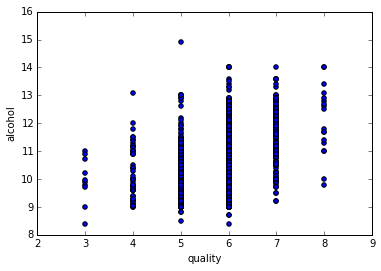

In [51]:
%matplotlib inline
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

From the above figure, it is clear that there is a positive correlation between alcohol level and quality. That is,
as the alcohol level increases, the quality of wine improves. 

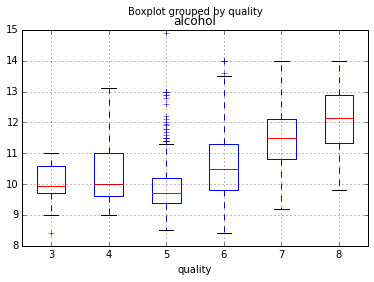

In [52]:
# However, a boxplot would be a better visualization for these data.
dframe_wine.boxplot(column='alcohol',by='quality')

Again, there seems to be a positive correlation between wine quality and alcohol level as concluded above. 

### Splitting, Applying and combining

What if we wanted to know the highest alcohol content for each quality range?

We can use groupby mechanics to split-apply-combine

In [53]:
# Create a function that assigns a rank to each wine based on alcohol content, with 1 being the highest alcohol 
# content
def ranker(df):
    df['alc_content_rank'] = np.arange(len(df)) + 1
    return df

In [56]:
dframe_wine.sort('alcohol',ascending=False,inplace=True)

In [57]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [63]:
dframe_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,1
144,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,2
1270,5.0,0.38,0.01,1.6,0.048,26,60,0.99084,3.70,0.75,14.0,6,0.428571,3
1269,5.5,0.49,0.03,1.8,0.044,28,87,0.99080,3.50,0.82,14.0,8,0.571429,2
467,8.8,0.46,0.45,2.6,0.065,7,18,0.99470,3.32,0.79,14.0,6,0.428571,4
821,4.9,0.42,0.00,2.1,0.048,16,42,0.99154,3.71,0.74,14.0,7,0.500000,1
1114,5.0,0.40,0.50,4.3,0.046,29,80,0.99020,3.49,0.66,13.6,6,0.441176,5
1228,5.1,0.42,0.00,1.8,0.044,18,88,0.99157,3.68,0.73,13.6,7,0.514706,2


In [60]:
dframe_wine['alcohol'].max()

14.9

In [72]:
dframe_wine[dframe_wine['alc_content_rank']== 1]
# Another way: dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22,71,0.99760,2.98,0.84,14.9,5,0.335570,1
588,5.0,0.42,0.24,2.0,0.060,19,50,0.99170,3.72,0.74,14.0,8,0.571429,1
142,5.2,0.34,0.00,1.8,0.050,27,63,0.99160,3.68,0.79,14.0,6,0.428571,1
821,4.9,0.42,0.00,2.1,0.048,16,42,0.99154,3.71,0.74,14.0,7,0.500000,1
45,4.6,0.52,0.15,2.1,0.054,8,65,0.99340,3.90,0.56,13.1,4,0.305344,1
899,8.3,1.02,0.02,3.4,0.084,6,11,0.99892,3.48,0.49,11.0,3,0.272727,1


In [73]:
# Number of wine in each of quality of wine
num_of_qual = dframe_wine['quality'].value_counts()

In [74]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

### Cross Tabulation

In [75]:
# Let's create a quick data set
from StringIO import StringIO

data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""

#Store as dframe
dframe = pd.read_table(StringIO(data),sep='\s+')

In [76]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [77]:
# Now we can create a cross-tabulation table, which is basically just a frequency table
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
